In [1]:
import pandas as pd
import numpy as np
from scipy.stats import expon, norm, chi2
import matplotlib.pyplot as plt
%matplotlib inline

FONTDICT = {
    "family": "serif", 
    "color": "darkred", 
    "weight": "normal", 
    "size": 12
}

In [2]:
df = pd.read_excel('.\PCS_TEST_DETERMINSTIC.xls', index_col=0, names=['index', 'arrival_time', 'base_station', 'call_duration', 'car_velocity'])
df['car_velocity'] = df['car_velocity'] / 3.6

print(df.shape)
df.head()

(10000, 4)


,arrival_time,base_station,call_duration,car_velocity
index,,,,
1,0.000000,18,76.133611,34.981737
2,0.067744,7,159.056244,26.530800
3,0.559184,6,179.465053,35.488182
4,0.625319,14,163.108320,37.308487
5,1.345066,2,95.054472,31.186766


In [32]:
def chi2test(data, dist, k, alpha):
    
    p = 1/k; n = len(data)
    loc, scale = dist.fit(data)

    theoretical_counts = [n*p for _ in range(k)]
    empirical_counts   = [0   for _ in range(k)]
    for x in data:
        cdf = dist.cdf(x, loc=loc, scale=scale)
        empirical_counts[min(int(cdf*k), k-1)] += 1
    
    df = k-3
    statistic = sum((
        (N_j - np_j)**2 / np_j
        for N_j, np_j in zip(empirical_counts, theoretical_counts)
    ))
    pp = chi2.ppf(1-alpha, df)
    
    return (loc, scale), statistic, pp

In [33]:
def fit(data, dist, title):

    k = int(np.ceil(np.sqrt(len(data)))); alpha = 0.05
    (loc, scale), statistic, pp = chi2test(data, dist, k, alpha)
    tab = '    '; print(
        f'Chi2 test with k = {k} at alpha = {alpha:.2f} level:',
        f'Parameters: loc = {loc:.6f}, scale = {scale:.6f}',
        f'ppf({1-alpha}, df={k-3}) = {pp:.6f}', 
        f'chi-square statistic, chi2 = {statistic:.6f}',
        sep=f'\n{tab}', end=f'\n{tab}'
    )
    print('Reject H0' if statistic > pp else 'Failed to reject H0')

    mn = np.min(data); mx = np.max(data)
    xs = np.linspace(start=mn, stop=mx, num=int(10*(mx-mn)))
    ys = dist.pdf(xs, loc=loc, scale=scale)

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=50, density=True, color='green', label='empirical distribution')
    plt.plot(xs, ys, color='blue', label=f'{dist.__class__.__name__.split("_")[0]}(loc={loc:.3f}, scale={scale:.3f})')
    plt.title(title, fontdict=FONTDICT, pad=12)
    plt.xlabel('bins', fontdict=FONTDICT, labelpad=12)
    plt.ylabel('density',  fontdict=FONTDICT, labelpad=12)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()

Chi2 test with k = 100 at alpha = 0.05 level:
    Parameters: loc = 0.000025, scale = 1.369792
    ppf(0.95, df=97) = 120.989644
    chi-square statistic, chi2 = 111.961096
    Failed to reject H0


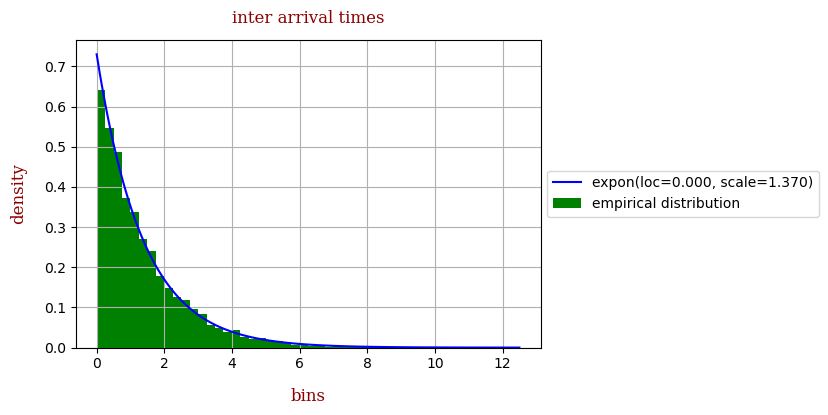

In [34]:
column = 'arrival_time'; dist = expon
data = df[column].diff(periods=1).values[1:]

fit(data, dist, 'inter arrival times')

Chi2 test with k = 100 at alpha = 0.05 level:
    Parameters: loc = 10.003952, scale = 99.831949
    ppf(0.95, df=97) = 120.989644
    chi-square statistic, chi2 = 97.020000
    Failed to reject H0


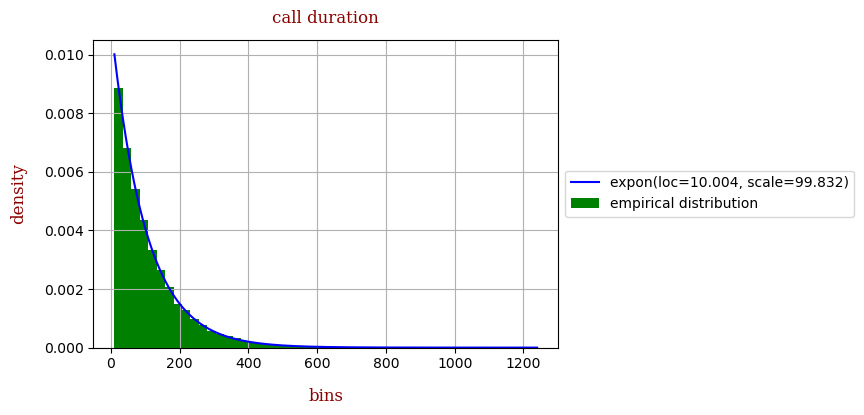

In [35]:
column = 'call_duration'; dist = expon
data = df[column].values

fit(data, dist, column.replace('_', ' '))

Chi2 test with k = 100 at alpha = 0.05 level:
    Parameters: loc = 33.353361, scale = 2.505169
    ppf(0.95, df=97) = 120.989644
    chi-square statistic, chi2 = 96.440000
    Failed to reject H0


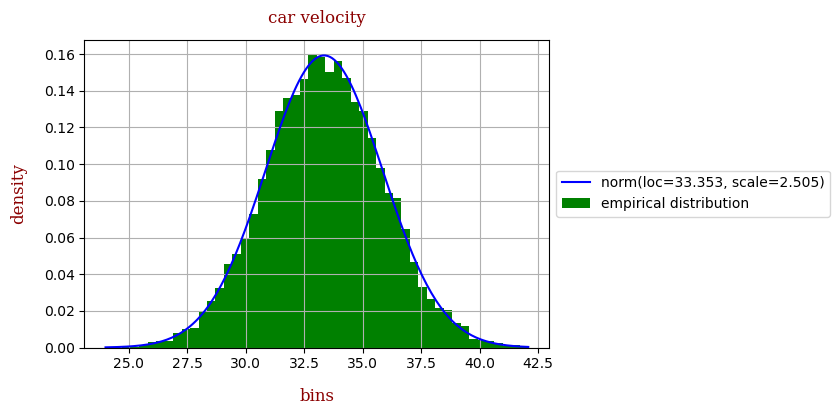

In [36]:
column = 'car_velocity'; dist = norm
data = df[column].values

fit(data, dist, column.replace('_', ' '))

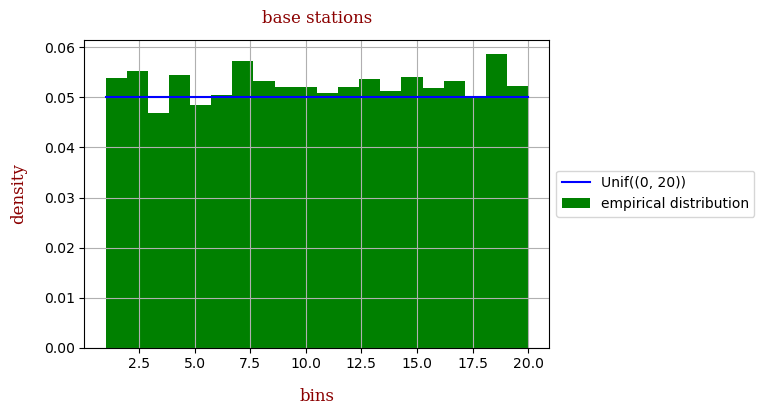

In [3]:
data = df['base_station'].values
xs = np.linspace(1, 20, 100)

plt.figure(figsize=(6, 4))
plt.hist(data, bins=20, density=True, color='green', label='empirical distribution')
plt.plot(xs, 0.05*np.ones_like(xs), color='blue', label=f'Unif((0, 20))')
plt.title('base stations', fontdict=FONTDICT, pad=12)
plt.xlabel('bins', fontdict=FONTDICT, labelpad=12)
plt.ylabel('density',  fontdict=FONTDICT, labelpad=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()